# Linear Model for California  Housing Prices Data set


This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.



In [91]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [92]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Describe the data set

lookng  at the describe method of the data frame we conclude that there are some  missing values in  total bedrooms . We will fill those values  with the median of the bedrooms 

In [93]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [83]:
#This  function will iterate  through the columns  and print out those columns that have null values 
def get_null_count_in_Columns(df):
    for col in df.columns.values:
        prcent_null = 0
        null_count = df[col].isna().sum()
        if (null_count > 0):
            prcent_null = null_count*100/ len(df[col])           
            print(f'The null count in {col} is {null_count}  which is  {prcent_null} % of the data ')

In [94]:
# It is important that we see how a particular  variables are distributed 
def get_value_distribution(value_col , color,title_name):
    plt.figure(figsize=(10,10))
    sns.histplot(value_col,bins=50,color=color)
    plt.title(title_name)
    plt.xlabel('Distribtion of ' + title_name , fontsize=20)
    plt.show()

### Handle missing data:
<p> We see that there is only column with missing. data that too a ery low percent  is actually missing 

In [95]:
get_null_count_in_Columns(df)
    

The null count in total_bedrooms is 207  which is  1.002906976744186 % of the data 


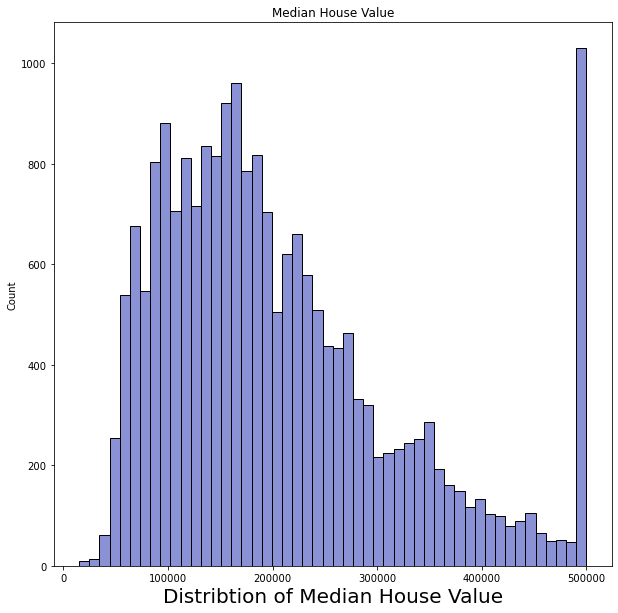

In [96]:
get_value_distribution(df['median_house_value'], color='#636EC8', title_name='Median House Value')

There is huge spike at  $50,000 . This  indicates some sort of skewness in the data. It is better to access the percentage and remove the value 

In [97]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(value= df['total_bedrooms'].median())
df = df[df['median_house_value']< 500001.0]

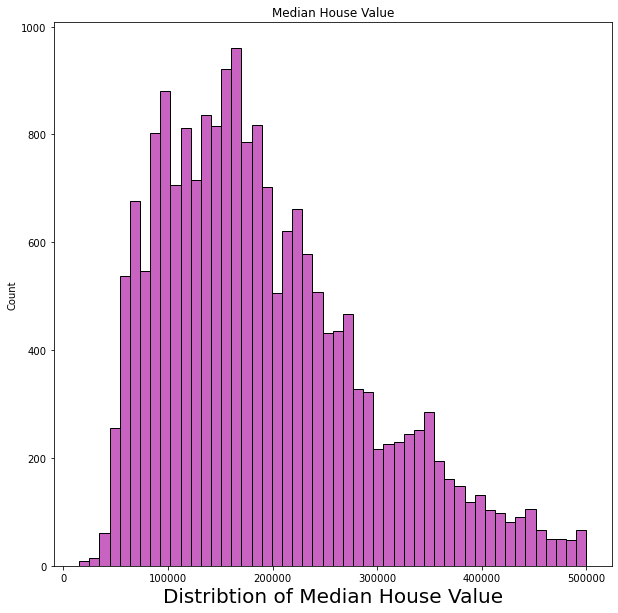

In [98]:
get_value_distribution(df['median_house_value'], color='#B82FAC', title_name='Median House Value')

### How  are the various  colums  relating itself to the feature vector:

<p> We will do a scatter plot  and see how the  values are related when plotted against  the feature <p>

In [100]:
def scatter_plots_of_given_data(df ,feature = 'median_house_value'):
    for col in df.columns.values:
        if(col!= feature):
            plt.figure(figsize=(20,10))
            plt.scatter(df[col] ,df[feature])
            plt.xlabel('Scatter Distribution of ' + str(col) +'with Median of house price', fontsize=15)
            plt.title('Scatter Distribution of  ' + str(col))
            plt.show

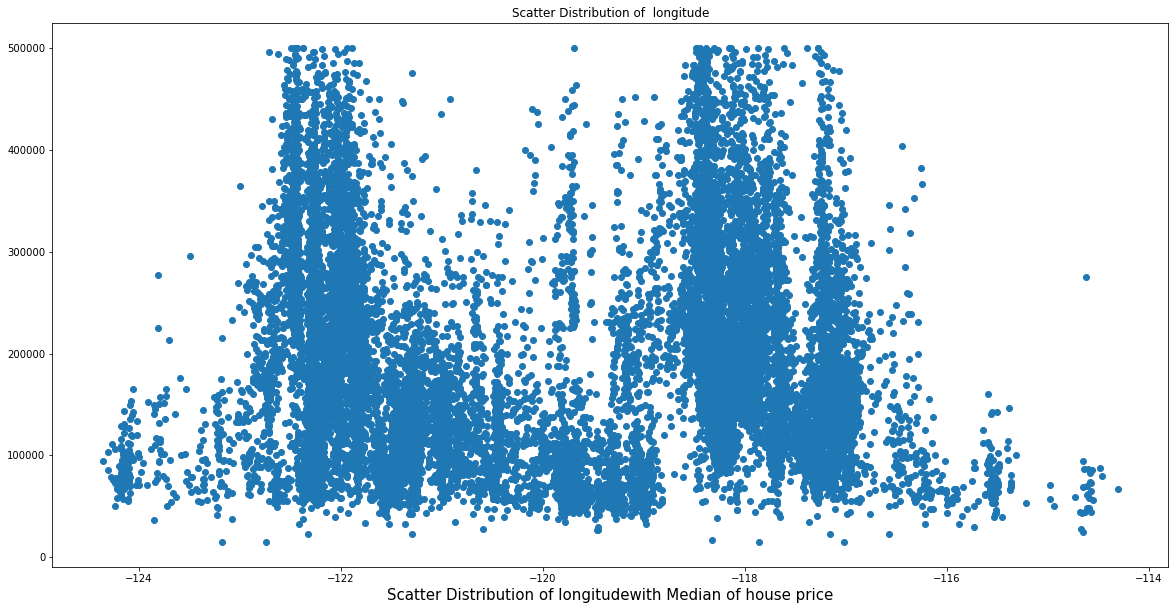

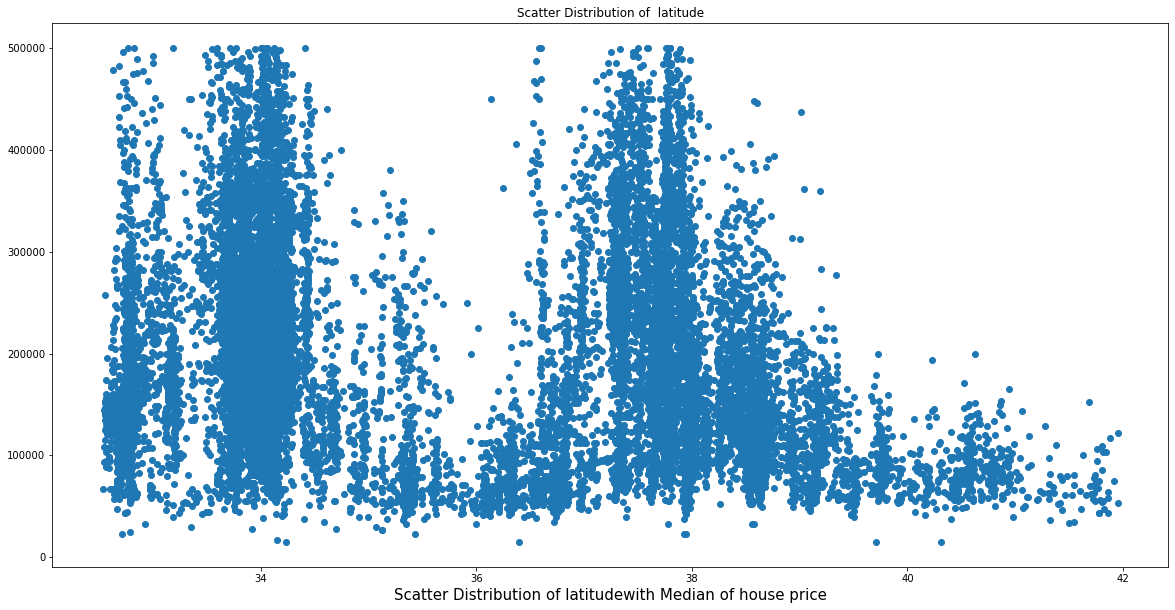

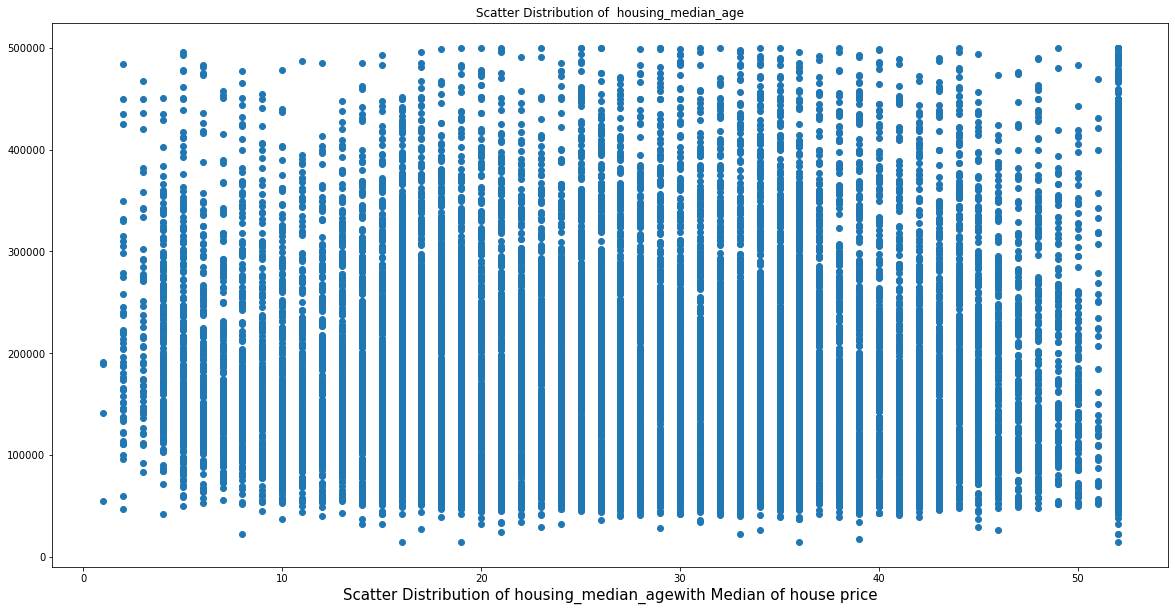

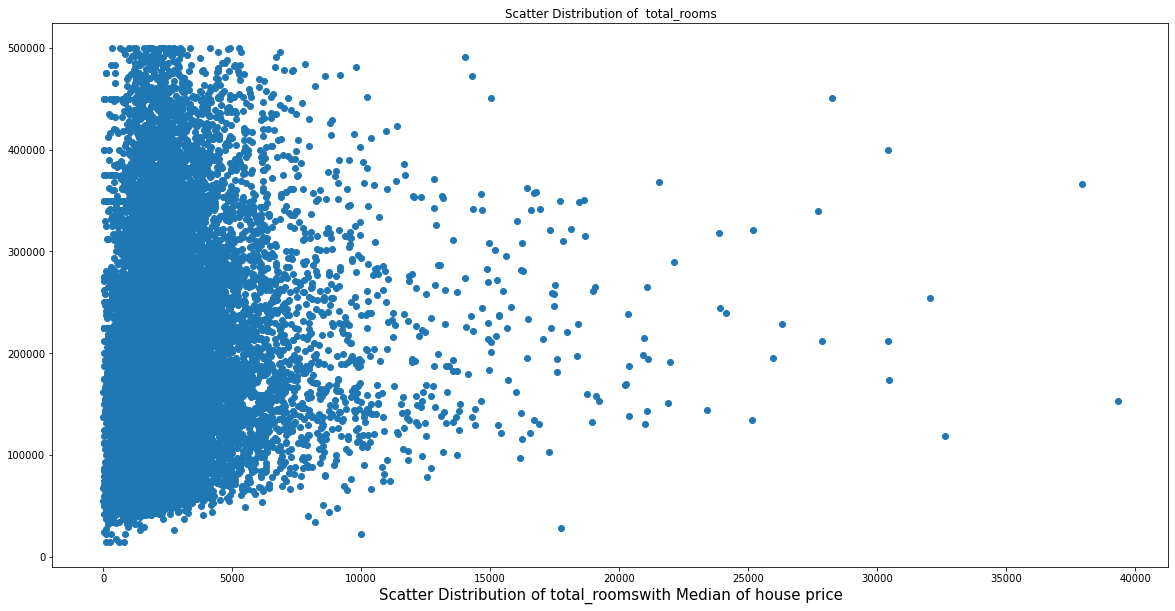

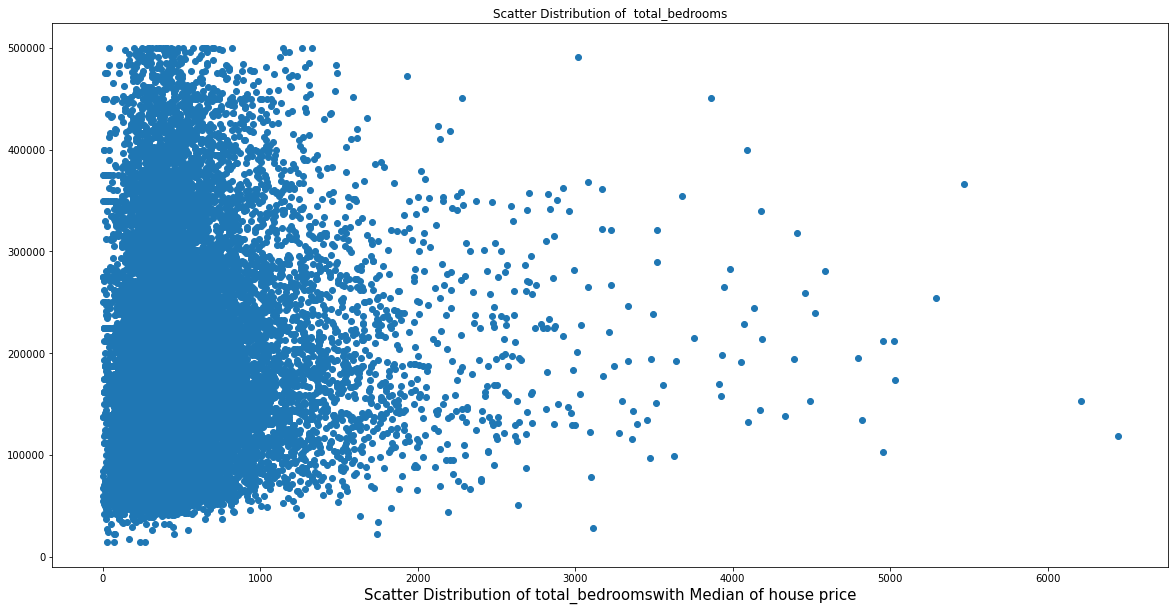

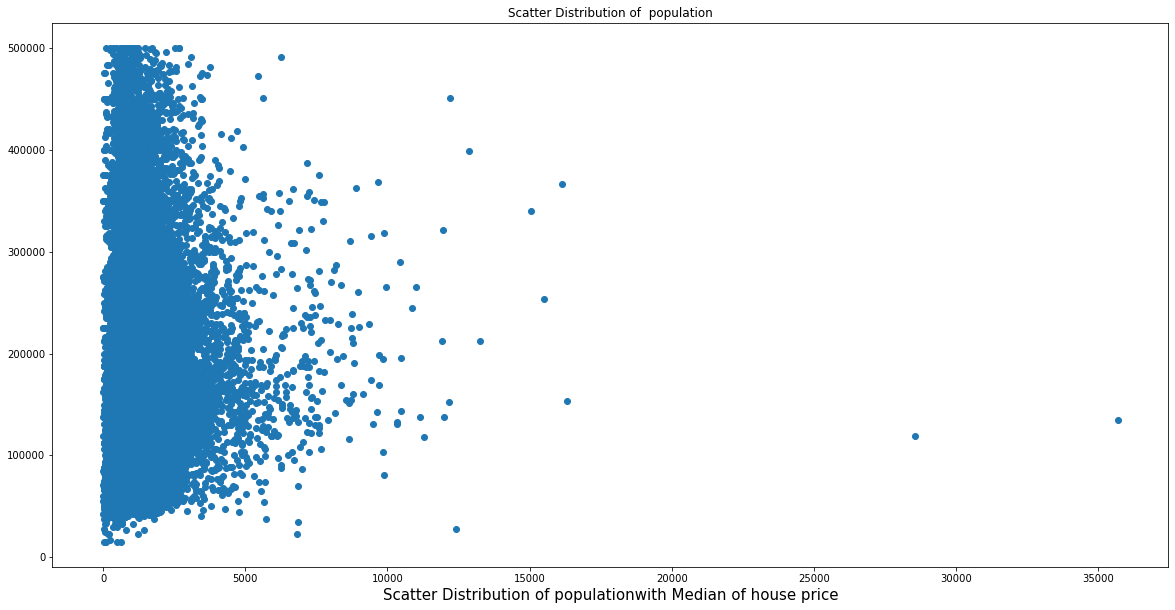

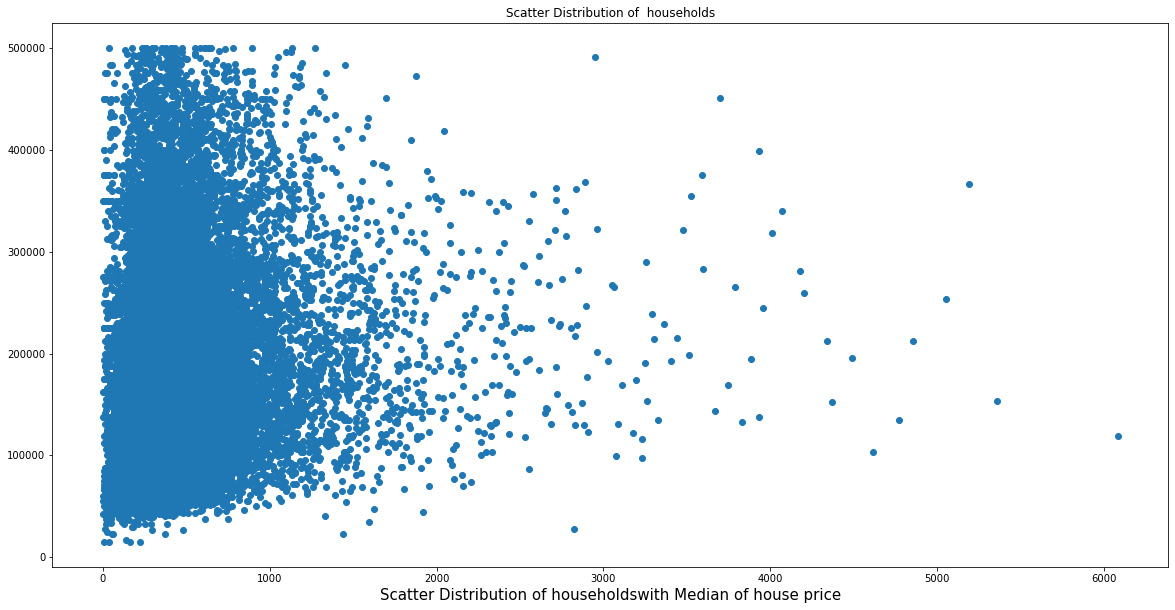

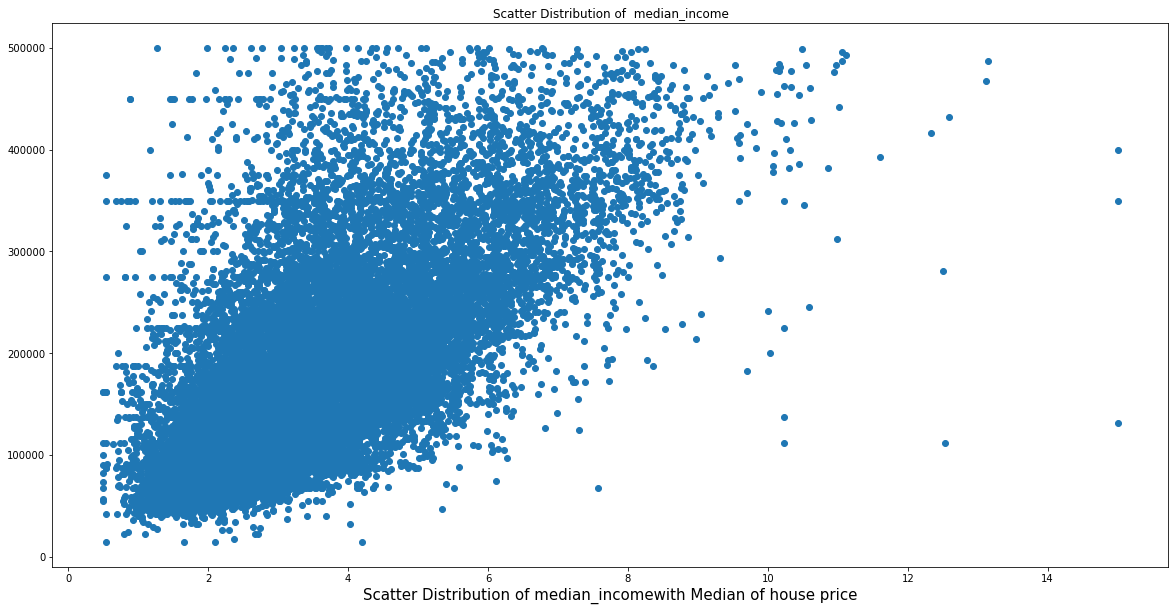

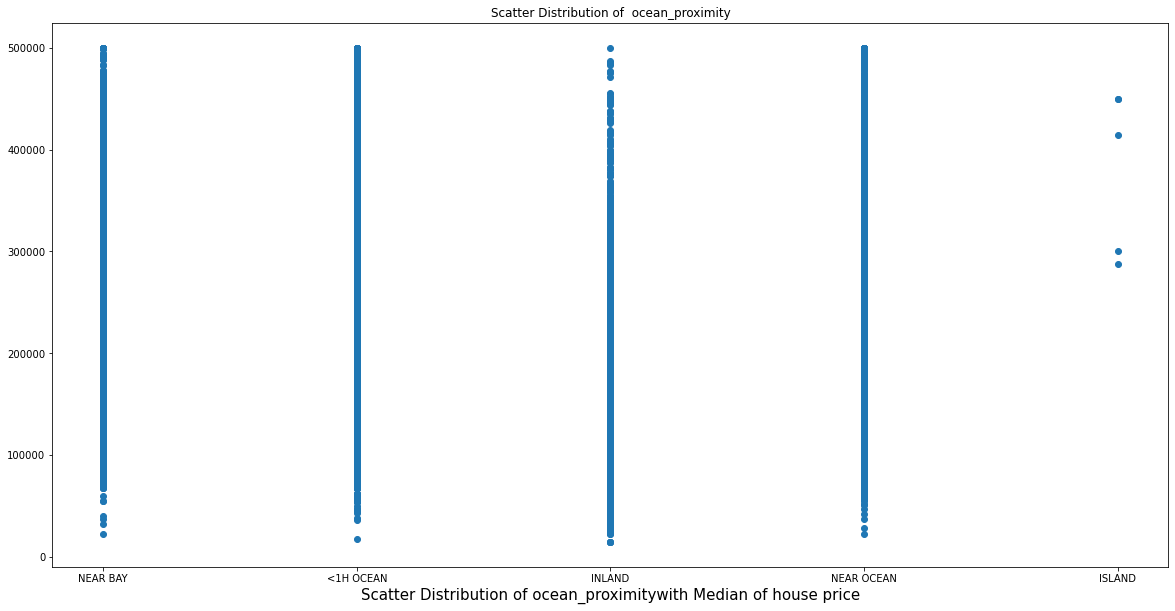

In [101]:
scatter_plots_of_given_data(df)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
df.drop(['ocean_proximity'], axis=1 , inplace=True)

In [104]:
x = df
Y = df.pop('median_house_value')

In [105]:
(x_train , x_test, Y_train, Y_test) =  train_test_split(x, Y , test_size=0.2)

In [106]:
poly_features = PolynomialFeatures()
x_train = poly_features.fit_transform(x_train)

model = LinearRegression()
model.fit(x_train , Y_train)

LinearRegression()

In [107]:
model.intercept_

25281110.914745454

In [108]:
model.coef_

array([-5.95250891e-03,  6.94847919e+05,  9.40229160e+05, -7.35020878e+04,
        1.02971271e+03, -3.34428312e+03,  4.88467281e+02, -3.35944001e+03,
       -8.51126343e+05,  4.61002471e+03,  1.17346923e+04, -8.83725305e+02,
        1.29830729e+01, -4.25863887e+01,  6.99871447e+00, -4.42938788e+01,
       -1.04856875e+04,  6.66098941e+03, -9.55901145e+02,  1.31931234e+01,
       -4.29562005e+01,  9.63487958e+00, -5.40979659e+01, -1.04289002e+04,
        2.17701240e+01, -1.29162894e-01,  7.89469514e-02, -1.10512057e+00,
        4.88641682e+00,  2.92018949e+02, -1.94884692e-03,  1.09887941e-02,
       -7.42535110e-03,  3.48245862e-02,  9.80866949e+00, -1.25741133e-02,
        4.70352215e-02, -1.98401848e-01, -2.73467703e+01,  3.06546589e-03,
       -3.04904140e-02, -2.61235032e+00,  6.18058509e-02, -4.15134558e+00,
       -6.29502785e+02])

In [109]:
predictions = model.predict(poly_features.fit_transform(x_test))

In [110]:
Y_test

309      100000.0
3968     220200.0
12733    320200.0
13673    161100.0
10711     77100.0
           ...   
10083    187500.0
13232    277000.0
9142     150800.0
3947     180500.0
11100    232000.0
Name: median_house_value, Length: 3935, dtype: float64

In [111]:
predictions

array([155580.62190586, 266336.55935622, 279463.55341682, ...,
       146944.51820016, 204544.34944755, 259146.0905193 ])

In [112]:
mean_squared_error(predictions , Y_test)

3307128427.5095005

In [113]:
r2_score(Y_test , predictions)

0.6488703962185608